In [1]:
options(device=pdf) # turn off flashy window on each block execution
# options(repr.plot.width=6, repr.plot.height=4)
Sys.setlocale("LC_ALL", "C")
initialWidth = getOption('width')
options(width=80) # for old folks like me who can't see shit and set font large

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [2]:
baseball = read.csv('data/baseball.csv.xz')

In [3]:
str(baseball)

'data.frame':	1232 obs. of  15 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 2 3 4 5 7 8 9 10 11 12 ...
 $ League      : Factor w/ 2 levels "AL","NL": 2 2 1 1 2 1 2 1 2 1 ...
 $ Year        : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ RS          : int  734 700 712 734 613 748 669 667 758 726 ...
 $ RA          : int  688 600 705 806 759 676 588 845 890 670 ...
 $ W           : int  81 94 93 69 61 85 97 68 64 88 ...
 $ OBP         : num  0.328 0.32 0.311 0.315 0.302 0.318 0.315 0.324 0.33 0.335 ...
 $ SLG         : num  0.418 0.389 0.417 0.415 0.378 0.422 0.411 0.381 0.436 0.422 ...
 $ BA          : num  0.259 0.247 0.247 0.26 0.24 0.255 0.251 0.251 0.274 0.268 ...
 $ Playoffs    : int  0 1 1 0 0 0 1 0 0 1 ...
 $ RankSeason  : int  NA 4 5 NA NA NA 2 NA NA 6 ...
 $ RankPlayoffs: int  NA 5 4 NA NA NA 4 NA NA 2 ...
 $ G           : int  162 162 162 162 162 162 162 162 162 162 ...
 $ OOBP        : num  0.317 0.306 0.315 0.331 0.335 0.319 0.305 0.3

In [4]:
moneyball = subset(baseball, Year < 2002)

In [5]:
str(moneyball)

'data.frame':	902 obs. of  15 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 1 2 2 1 1 2 1 2 1 2 ...
 $ Year        : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ RS          : int  691 818 729 687 772 777 798 735 897 923 ...
 $ RA          : int  730 677 643 829 745 701 795 850 821 906 ...
 $ W           : int  75 92 88 63 82 88 83 66 91 73 ...
 $ OBP         : num  0.327 0.341 0.324 0.319 0.334 0.336 0.334 0.324 0.35 0.354 ...
 $ SLG         : num  0.405 0.442 0.412 0.38 0.439 0.43 0.451 0.419 0.458 0.483 ...
 $ BA          : num  0.261 0.267 0.26 0.248 0.266 0.261 0.268 0.262 0.278 0.292 ...
 $ Playoffs    : int  0 1 1 0 0 0 0 0 1 0 ...
 $ RankSeason  : int  NA 5 7 NA NA NA NA NA 6 NA ...
 $ RankPlayoffs: int  NA 1 3 NA NA NA NA NA 4 NA ...
 $ G           : int  162 162 162 162 161 162 162 162 162 162 ...
 $ OOBP        : num  0.331 0.311 0.314 0.337 0.329 0.321 0.334 0.3

In [6]:
moneyball$RD = moneyball$RS - moneyball$RA

In [7]:
str(moneyball)

'data.frame':	902 obs. of  16 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 1 2 2 1 1 2 1 2 1 2 ...
 $ Year        : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ RS          : int  691 818 729 687 772 777 798 735 897 923 ...
 $ RA          : int  730 677 643 829 745 701 795 850 821 906 ...
 $ W           : int  75 92 88 63 82 88 83 66 91 73 ...
 $ OBP         : num  0.327 0.341 0.324 0.319 0.334 0.336 0.334 0.324 0.35 0.354 ...
 $ SLG         : num  0.405 0.442 0.412 0.38 0.439 0.43 0.451 0.419 0.458 0.483 ...
 $ BA          : num  0.261 0.267 0.26 0.248 0.266 0.261 0.268 0.262 0.278 0.292 ...
 $ Playoffs    : int  0 1 1 0 0 0 0 0 1 0 ...
 $ RankSeason  : int  NA 5 7 NA NA NA NA NA 6 NA ...
 $ RankPlayoffs: int  NA 1 3 NA NA NA NA NA 4 NA ...
 $ G           : int  162 162 162 162 161 162 162 162 162 162 ...
 $ OOBP        : num  0.331 0.311 0.314 0.337 0.329 0.321 0.334 0.3

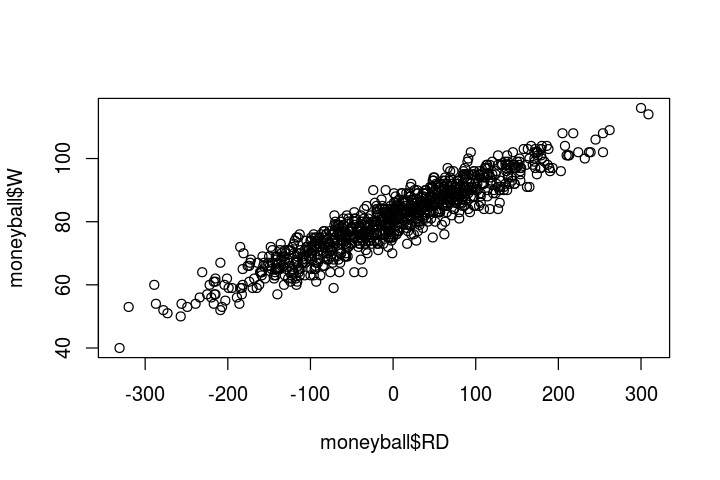

In [9]:
options(repr.plot.width=6, repr.plot.height=4)
plot(moneyball$RD, moneyball$W)

In [10]:
WinsReg = lm(W ~ RD, data=moneyball)

In [11]:
summary(WinsReg)


Call:
lm(formula = W ~ RD, data = moneyball)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2662  -2.6509   0.1234   2.9364  11.6570 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 80.881375   0.131157  616.67   <2e-16 ***
RD           0.105766   0.001297   81.55   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.939 on 900 degrees of freedom
Multiple R-squared:  0.8808,	Adjusted R-squared:  0.8807 
F-statistic:  6651 on 1 and 900 DF,  p-value: < 2.2e-16


In [12]:
80.881375 + 0.105766 * (713 - 613)

[1] 91.45798

In [13]:
str(moneyball)

'data.frame':	902 obs. of  16 variables:
 $ Team        : Factor w/ 39 levels "ANA","ARI","ATL",..: 1 2 3 4 5 7 8 9 10 11 ...
 $ League      : Factor w/ 2 levels "AL","NL": 1 2 2 1 1 2 1 2 1 2 ...
 $ Year        : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ RS          : int  691 818 729 687 772 777 798 735 897 923 ...
 $ RA          : int  730 677 643 829 745 701 795 850 821 906 ...
 $ W           : int  75 92 88 63 82 88 83 66 91 73 ...
 $ OBP         : num  0.327 0.341 0.324 0.319 0.334 0.336 0.334 0.324 0.35 0.354 ...
 $ SLG         : num  0.405 0.442 0.412 0.38 0.439 0.43 0.451 0.419 0.458 0.483 ...
 $ BA          : num  0.261 0.267 0.26 0.248 0.266 0.261 0.268 0.262 0.278 0.292 ...
 $ Playoffs    : int  0 1 1 0 0 0 0 0 1 0 ...
 $ RankSeason  : int  NA 5 7 NA NA NA NA NA 6 NA ...
 $ RankPlayoffs: int  NA 1 3 NA NA NA NA NA 4 NA ...
 $ G           : int  162 162 162 162 161 162 162 162 162 162 ...
 $ OOBP        : num  0.331 0.311 0.314 0.337 0.329 0.321 0.334 0.3

In [14]:
RunsReg = lm(RS ~ OBP + SLG + BA, data=moneyball)

In [15]:
summary(RunsReg)


Call:
lm(formula = RS ~ OBP + SLG + BA, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.941 -17.247  -0.621  16.754  90.998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -788.46      19.70 -40.029  < 2e-16 ***
OBP          2917.42     110.47  26.410  < 2e-16 ***
SLG          1637.93      45.99  35.612  < 2e-16 ***
BA           -368.97     130.58  -2.826  0.00482 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.69 on 898 degrees of freedom
Multiple R-squared:  0.9302,	Adjusted R-squared:   0.93 
F-statistic:  3989 on 3 and 898 DF,  p-value: < 2.2e-16


In [16]:
RunsReg = lm(RS ~ OBP + SLG, data=moneyball)
summary(RunsReg)


Call:
lm(formula = RS ~ OBP + SLG, data = moneyball)

Residuals:
    Min      1Q  Median      3Q     Max 
-70.838 -17.174  -1.108  16.770  90.036 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -804.63      18.92  -42.53   <2e-16 ***
OBP          2737.77      90.68   30.19   <2e-16 ***
SLG          1584.91      42.16   37.60   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 24.79 on 899 degrees of freedom
Multiple R-squared:  0.9296,	Adjusted R-squared:  0.9294 
F-statistic:  5934 on 2 and 899 DF,  p-value: < 2.2e-16


In [20]:
-804.63 + 2737.77 * 0.311 + 1584.91 * 0.405
-837.38 + 2913.60 * 0.297 + 1514.29 * 0.370

[1] 688.705

[1] 588.2465

In [33]:
t = data.frame(OBP=c(0.338, 0.391, 0.369, 0.313, 0.361),
               SLG=c(0.540, 0.450, 0.374, 0.447, 0.500))
sort(predict(RunsReg, t))

4        3        5        1        2 
760.7485 798.3652 976.1615 976.5892 979.0491

In [37]:
teamRank = c(1,2,3,3,4,4,4,4,5,5)
wins2012 = c(94,88,95,88,93,94,98,97,93,94)
wins2013 = c(97,97,92,93,92,96,94,96,92,90)
cor(teamRank, wins2012)
cor(teamRank, wins2013)

[1] 0.3477129

[1] -0.6556945